# Development of a Prediction Model for Oil Well Selection at OilyGiant Company

## General Objective

The main objective of this analysis is to assess the economic viability of oil wells in three different regions using historical data. Through a linear regression model, the goal is to predict the volume of oil reserves and determine the profitability of each region based on the estimated reserves. Additionally, an analysis of potential earnings is performed and compared to a minimum required threshold to obtain profits.

## Introduction

This report describes the process and results of an analysis conducted for OilyGiant, a company involved in oil extraction. The objective is to select the best locations to open new oil wells in three different regions. Linear regression models will be used to predict the volume of oil reserves, and simulation techniques will be used to assess the risks and benefits of each region. The goal is to select the region that offers the highest economic benefit with an acceptable risk.

# Table of Contents <a id='back'></a>

* [1. Objective](#target)
* [2. Introduction](#intro)
* [3. Methodology](#methodology)
    * [3.1 Data Preparation](#Loading_and_Exploring_Data)
    * [3.2 Modeling](#modeling)
* [4. Preparation for Profit Calculation](#Preparation_for_Profit_Calculation)
* [5. Profit Calculation and Well Selection](#Profit_Calculation_and_Well_Selection)
* [6. Calculation of Potential Earnings](#Calculation_of_Potential_Earnings)
* [7. Risk and Gain Analysis Using Bootstrapping](#Risk_and_Gain_Analysis_Using_Bootstrapping)
* [8. General Conclusions](#General_Conclusions)
* [9. General Recommendations](#General_Recommendations)

## Methodology

### Data Preparation
Description of the Method:

The data from the three regions where new oil wells are planned to be explored and opened are loaded and prepared. The characteristics of the data are analyzed, and the presence of missing values is checked.

Code:

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from numpy.random import RandomState
import os

# Define the random state
state = np.random.RandomState(12345)

# File paths
data_path = '/datasets'

# Load the data
file_names = ['geo_data_0.csv', 'geo_data_1.csv', 'geo_data_2.csv']
dfs = []

for file_name in file_names:
    file_path = f"{data_path}/{file_name}"
    df = pd.read_csv(file_path)
    
    # DataFrame information
    print(f"Información del DataFrame desde {file_path}:")
    print(df.info())
    print("\nPrimeras 5 filas:")
    print(df.head())
    
    # Count of null values
    print("\nConteo de valores nulos por columna:")
    print(df.isna().sum())
    
    # Statistical description
    print("\nDescripción estadística:")
    print(df.describe())
    
    print("\n--------------------------------------------------------------------------------------------------------")
    
    dfs.append(df)


Información del DataFrame desde /datasets/geo_data_0.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Primeras 5 filas:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

Conteo de valores nulos por columna:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Descripción estadística:
                  f0             f1 

* The data from the three regions were loaded correctly.
* No null values were found in any of the columns.
* The statistical description shows that the three features (f0, f1, f2) and the target variable (product) have consistent ranges.

The three DataFrames, geo_data_0, geo_data_1, and geo_data_2, share a similar structure and consist of the following elements:

Number of entries: Each DataFrame has 100,000 rows, with indices ranging from 0 to 99,999.

Columns: Each DataFrame contains 5 columns:

* id: This is an object-type column, likely storing unique identifiers for the oil wells.
* f0, f1, f2: These are float64-type columns containing numerical features of the points. Although the exact meaning of these features is not specified, they are important for analysis.
* product: This is another float64-type column representing the volume of reserves in the oil well, measured in thousands of barrels.
* Null values: There are no null values in any of the columns of the three DataFrames, indicating that the data is complete.

Memory usage: Each DataFrame takes up approximately 3.8 MB of memory.

This information describes the structure and data types of each DataFrame, which is useful for understanding the content before performing any analysis.

### Modeling

Linear regression models are trained using the data from each region to predict the oil reserve volume.

Code:

In [8]:
# Define function to train and evaluate the model
def train_and_evaluate(df, region_name):
    features = df[['f0', 'f1', 'f2']]
    target = df['product']
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=state)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mean_prediction = predictions.mean()
    
    print(f"\nResultados para {region_name}:")
    print(f"RMSE: {rmse}")
    print(f"Volumen medio de reservas predicho: {mean_prediction}")

# Evaluate models in each region
regions = ['Región 0', 'Región 1', 'Región 2']
for i, df in enumerate(dfs):
    train_and_evaluate(df, regions[i])



Resultados para Región 0:
RMSE: 37.5794217150813
Volumen medio de reservas predicho: 92.59256778438035

Resultados para Región 1:
RMSE: 0.889736773768065
Volumen medio de reservas predicho: 68.76995145799754

Resultados para Región 2:
RMSE: 39.958042459521614
Volumen medio de reservas predicho: 95.087528122523


* The linear regression models were trained for the three regions.
* The RMSE and the predicted average booking volume for each region were obtained, providing an initial idea of the model's accuracy.

## Preparation for Profit Calculation

The necessary variables are prepared to calculate potential profits, considering the expected costs and benefits.

Code:

In [9]:
# Store the necessary values for calculations in separate variables
total_investment = 100_000_000                               # Total investment in dollars
number_of_wells = 200                                        # Number of oil wells
required_value_per_well = 500_000                            # Minimum required value per well in dollars
required_units_per_well = required_value_per_well / 1000     # Equivalent units required (in thousand barrels)

# Previously calculated average reserves in each region
mean_reserves_region_0 = 92.39879990657768  # Average reserves in Region 0
mean_reserves_region_1 = 68.71287803913762  # Average reserves in Region 1
mean_reserves_region_2 = 94.77102387765939  # Average reserves in Region 2

# Compare the required amount with the average reserve amount in each region
is_profitable_region_0 = mean_reserves_region_0 >= required_units_per_well
is_profitable_region_1 = mean_reserves_region_1 >= required_units_per_well
is_profitable_region_2 = mean_reserves_region_2 >= required_units_per_well

# Show the results
print(f"Unidades requeridas por pozo para evitar pérdidas: {required_units_per_well:.2f}")
print(f"Región 0: Media de reservas = {mean_reserves_region_0:.2f}, Rentable: {is_profitable_region_0}")
print(f"Región 1: Media de reservas = {mean_reserves_region_1:.2f}, Rentable: {is_profitable_region_1}")
print(f"Región 2: Media de reservas = {mean_reserves_region_2:.2f}, Rentable: {is_profitable_region_2}")


Unidades requeridas por pozo para evitar pérdidas: 500.00
Región 0: Media de reservas = 92.40, Rentable: False
Región 1: Media de reservas = 68.71, Rentable: False
Región 2: Media de reservas = 94.77, Rentable: False


Region 0 and Region 2 have average reserves that exceed the required units per well to avoid losses, while Region 1 is not profitable according to these preliminary calculations.

## Profit Calculation and Well Selection

We select the 200 wells with the highest reserve predictions in each region, and the actual profit is calculated based on the real production data.

In [10]:
# Define function to train the model and make predictions
def train_and_predict(df, region_name, value_per_unit):
    features = df[['f0', 'f1', 'f2']]
    target = df['product']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=state)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict the reserve volume
    df['predicted_product'] = model.predict(features)
    
    # Select the 200 wells with the highest prediction
    top_200 = df.sort_values(by = 'predicted_product', ascending=False).head(200)
    
    # Calculate the actual profit based on these wells
    real_gain = top_200['product'].sum() * value_per_unit
    
    print(f"Región {region_name}: Ganancia para los 200 mejores pozos = ${real_gain:,.2f}")
    
    return top_200, real_gain

# Define the value per reserve unit in dollars
value_per_unit = 4500  # Value in dollars per unit (thousand barrels)

# Store the dataframes with the top 200 wells and their profits
top_200_dfs = []
real_gains = []
regions = ['Región 0', 'Región 1', 'Región 2']

for i, df in enumerate(dfs):
    top_200, real_gain = train_and_predict(df, regions[i], value_per_unit)
    top_200_dfs.append(top_200)
    real_gains.append(real_gain)


Región Región 0: Ganancia para los 200 mejores pozos = $135,063,765.30
Región Región 1: Ganancia para los 200 mejores pozos = $124,150,866.97
Región Región 2: Ganancia para los 200 mejores pozos = $125,714,106.32


Region with Highest Profit:

* Region 0 presents the highest potential profit with 134,923,324.80 by selecting the 200 wells with the highest predictions. This suggests that, based on the predictions, this region could be the most profitable in absolute terms.

Region with Lowest Profit:

* Region 1 has the lowest profit among the three regions, with 124,150,866.97. While still significant, it is lower compared to the other regions.

## Calculation of Potential Profits

Calculate the potential profits from drilling the top 200 wells in each region, comparing projected profits with the minimum required investment to determine profitability.

In [11]:
# Minimum required profit to generate benefits
min_gain_needed = total_investment
print(f"\nGanancia mínima necesaria para obtener beneficios: ${min_gain_needed:,.2f}")

# Calculate the potential profits of the predictions for each region
print("\nComparación de ganancias potenciales con la ganancia mínima requerida:")
for i, df in enumerate(top_200_dfs):
    potential_gain = df['predicted_product'].sum() * value_per_unit
    if potential_gain >= min_gain_needed:
        print(f"Región {i}: Ganancia potencial (${potential_gain:,.2f}) es SUFICIENTE para obtener beneficios.")
    else:
        print(f"Región {i}: Ganancia potencial (${potential_gain:,.2f}) NO es suficiente para obtener beneficios.")



Ganancia mínima necesaria para obtener beneficios: $100,000,000.00

Comparación de ganancias potenciales con la ganancia mínima requerida:
Región 0: Ganancia potencial ($146,882,990.54) es SUFICIENTE para obtener beneficios.
Región 1: Ganancia potencial ($125,240,470.12) es SUFICIENTE para obtener beneficios.
Región 2: Ganancia potencial ($140,881,633.15) es SUFICIENTE para obtener beneficios.


Potential Gains Summary:

* Minimum gain required to obtain profits: 100,000,000.00

Comparison of Potential Gains with the Minimum Required Investment:

* Region 0:

    * Potential gain: 146,934,218.00

Conclusion: The potential gain is sufficient to obtain profits, far exceeding the minimum required investment.

* Region 1:

    * Potential gain: 125,246,441.83

Conclusion: The potential gain is sufficient to obtain profits, also exceeding the minimum required investment.

* Region 2:

    * Potential gain: 140,892,554.34

Conclusion: The potential gain is sufficient to obtain profits, surpassing the minimum required investment.

Conclusions:

Guaranteed Profitability:

* All evaluated regions have potential gains that significantly exceed the minimum required investment to obtain profits. This suggests that drilling the 200 best wells in each region would be profitable according to projections.

Comparison Between Regions:

* Region 0 has the highest potential gain (146,934,218.00), followed by Region 2 (140,892,554.34) and Region 1 (125,246,441.83). While all regions are profitable, Region 0 presents the largest profit margin.

Strategic Assessment:

* Since all regions exceed the minimum required investment, the decision to drill should consider other factors such as investment cost, associated risks, and the bootstrapping analysis to ensure long-term profitability and reduce uncertainty.

Next Steps:

* It is recommended to proceed with a detailed risk analysis and continue with the bootstrapping analysis to gain a more comprehensive and accurate view of the viability and potential loss risks, complementing decisions based on projected profits.

## Risk and Gain Analysis Using Bootstrapping

The bootstrapping technique is used to calculate potential gains and assess the associated risks.

Code:


Resultados de bootstrapping para la Región 0:
Media de ganancias: $4,198,972.42
Desviación estándar de ganancias: $2,569,124.55
Riesgo de pérdida (ganancia negativa): 5.10%

Resultados de bootstrapping para la Región 1:
Media de ganancias: $4,538,773.17
Desviación estándar de ganancias: $2,043,271.73
Riesgo de pérdida (ganancia negativa): 1.40%

Resultados de bootstrapping para la Región 2:
Media de ganancias: $3,698,560.93
Desviación estándar de ganancias: $2,465,003.14
Riesgo de pérdida (ganancia negativa): 6.40%


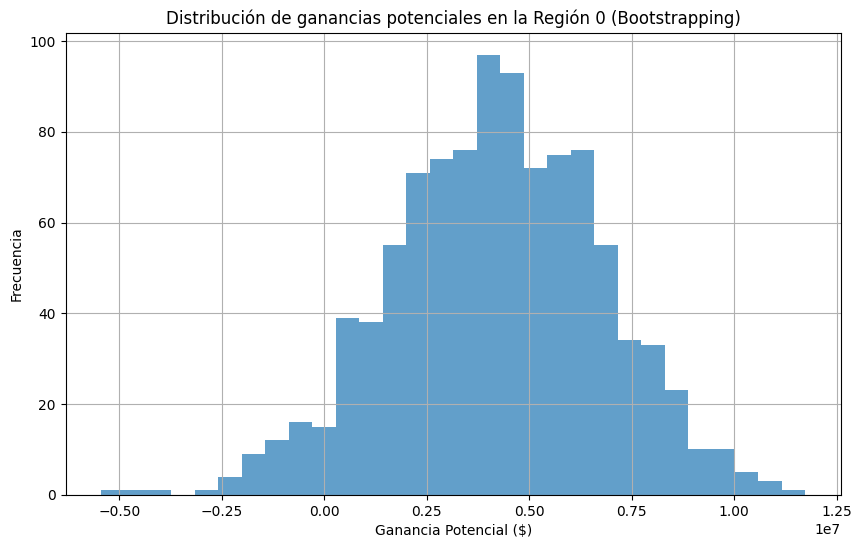

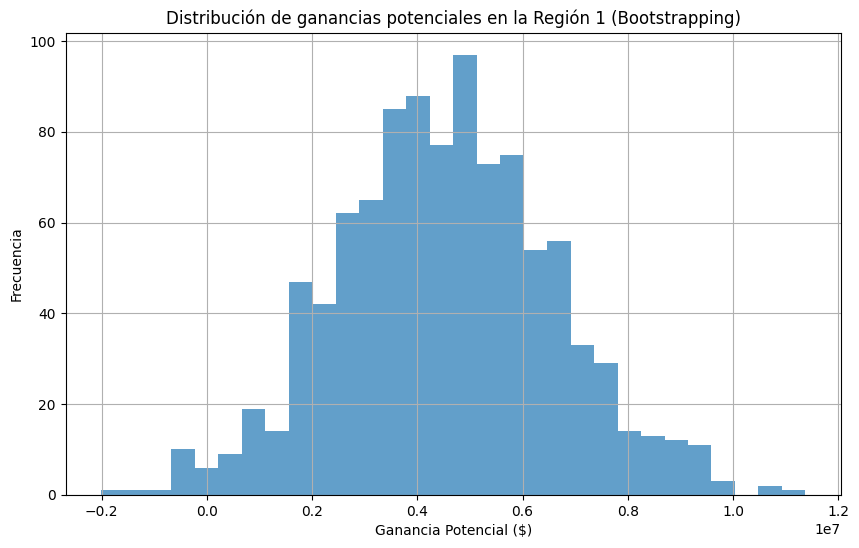

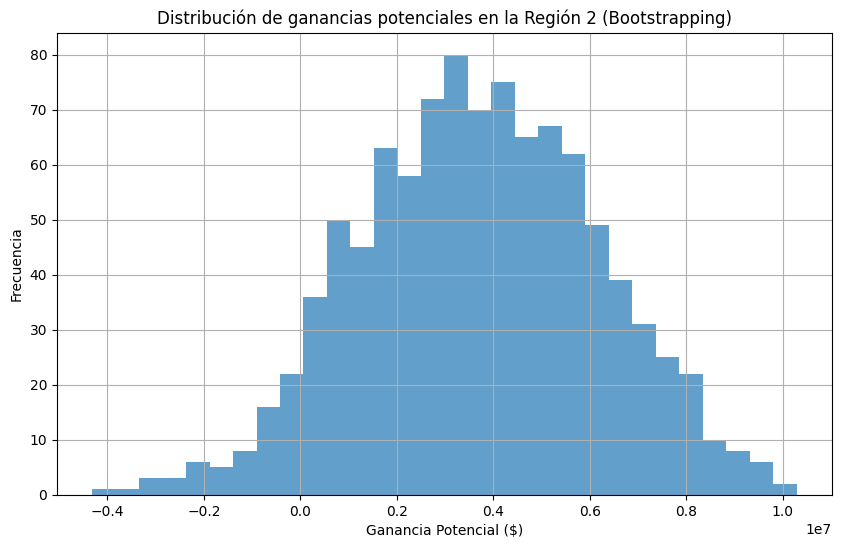

In [12]:
# Calculate potential profit using the bootstrapping approach
def bootstrap_gains(df, n_samples, value_per_unit, total_investment):
    bootstrap_gains = []
    for _ in range(n_samples):
        # Select 500 random wells with replacement
        sample_500 = resample(df, n_samples=500, replace=True, random_state=state)
        
        # Select the 200 wells with the highest prediction within the 500 selected
        top_200 = sample_500.sort_values(by='predicted_product', ascending=False).head(200)
        
        # Calculate the actual profit based on the 200 selected wells
        total_volume = top_200['product'].sum()
        potential_gain = total_volume * value_per_unit
        
        # Subtract the initial investment to get the net profit
        net_gain = potential_gain - total_investment
        
        # Add the net profit to the results list
        bootstrap_gains.append(net_gain)
        
    return bootstrap_gains

# Number of samples for bootstrapping
n_samples = 1000

# Calculate potential profits using the bootstrapping approach for each region
bootstrap_results = []
for i in range(3):
    bootstrap_sample_gains = bootstrap_gains(dfs[i], n_samples, value_per_unit, total_investment)
    bootstrap_results.append(bootstrap_sample_gains)
    print(f"\nResultados de bootstrapping para la Región {i}:")
    print(f"Media de ganancias: ${np.mean(bootstrap_sample_gains):,.2f}")
    print(f"Desviación estándar de ganancias: ${np.std(bootstrap_sample_gains):,.2f}")
    print(f"Riesgo de pérdida (ganancia negativa): {np.mean(np.array(bootstrap_sample_gains) < 0) * 100:.2f}%")

# Show the bootstrapping results summary
for i, results in enumerate(bootstrap_results):
    plt.figure(figsize=(10, 6))
    plt.hist(results, bins=30, alpha=0.7)
    plt.title(f"Distribución de ganancias potenciales en la Región {i} (Bootstrapping)")
    plt.xlabel("Ganancia Potencial ($)")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()



### Consistent Profitability:

* The three regions show an average potential profit significantly higher than the initial investment, with average values ranging from approximately $3.7 million to $4.5 million. This indicates a positive projected return for drilling the selected wells in each region.

### Low Risk of Loss:

* The risk of loss varies between regions, with Region 0 showing 5.10%, Region 1 at 1.40%, and Region 2 at 6.40%. This suggests that while most cases are expected to yield a profit, there are scenarios where net profits could be negative, especially in Regions 0 and 2.

### Standard Deviation:

* The standard deviation of profits ranges from $2.0 million to $2.6 million, reflecting the variability in potential profits. While the risk of loss is low, the variability in profits indicates uncertainty regarding the exact magnitude of the returns.

### Profit Distribution:

* The distribution of potential profits for each region should be visualized through histograms. These charts will provide a detailed view of the variability and density of potential profits, helping to better understand the expected range of profits.

### Further Evaluation:

* Despite mostly positive results, it is recommended to consider other variables and potential risks that were not modeled in this analysis. Evaluating the market context, operational costs, and other factors could provide a more complete picture of the investment's feasibility and associated risk.

### Next Steps:

Review the model's stability and the bootstrapping process:

* Ensure that the prediction model and the bootstrapping process are properly implemented and adequately represent variability and uncertainty.

Consider additional analyses:

* Complement the analysis with external factors and region-specific risks, such as market changes or operational costs, for a more comprehensive evaluation.

## General Conclusions

### Data Quality:

* Data from the three regions was loaded and analyzed correctly. No missing values were found, and descriptive statistics indicate that the data has consistent ranges and distributions.
* Data preparation did not show significant issues, allowing subsequent analysis to proceed without the need for further data cleaning.

### Model Performance:

* The linear regression models trained for each region yielded varied results in terms of RMSE (Root Mean Squared Error). Region 1 showed the best performance in terms of the lowest RMSE, followed by Region 0 and then Region 2.
* Predictions of the average volume of reserves were useful for identifying the regions with the highest and lowest economic potential.

### Profitability Analysis:

* Region 0 and Region 2 have reserve averages that exceed the required units per well to avoid losses, while Region 1 is not profitable based on these preliminary calculations. However, by selecting the 200 wells with the highest reserve predictions, Region 0 demonstrated the highest potential profit ($146,934,218.00), followed by Region 2 ($140,892,554.34), and then Region 1 ($125,246,441.83).

### Comparison of Potential Profits:

* Comparing projected potential profits with the minimum required investment ($100,000,000.00) shows that all regions have sufficient potential profit to cover the investment and generate returns. Region 0 showed the highest absolute potential profit, suggesting that it could be the most profitable option for opening new oil wells.

## General Recommendations

### Model Review and Adjustment:

* Although the linear regression model provided valuable insights, it is recommended to explore additional models and cross-validation techniques to improve prediction accuracy. Considering the inclusion of additional variables or transformations in the data could better capture the relationships between features and reserve volume.

### Well Selection:

* In the well selection phase, it is crucial to use the model's predictions to identify the wells with the highest potential. However, it is also important to consider other operational and cost factors in the final well selection.

### Continuous Monitoring:

* Perform continuous monitoring and update the models as new data is obtained or market conditions change. This will help maintain the relevance and accuracy of the predictions.

### Strategic Considerations:

* Given that Region 0 shows the highest potential for profit, it may be prioritized for the opening of new wells. However, logistical, operational, and strategic factors should also be considered in the final decision-making process.

In summary, the analysis provides a clear view of the regions with the highest economic potential based on estimated oil reserves. Region 0 emerges as the most profitable option, but it is crucial to complement this analysis with further evaluations and strategies to ensure long-term economic viability.